In [1]:
# necessary imports
from urllib.request import urlopen
import re
from collections import defaultdict
import numpy as np 
import requests
import timeit
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams.update({'font.size': 14})
plt.style.use('ggplot')

In [2]:
ROOT_NODE = "https://www.strathmore.edu/"
DEPTH = 10

In [3]:
# Depth first search function 
def dfs(graph):
    visited = {anode:False for anode in range(len(graph))}
    stack = list()
    stack.append(0)
    while len(stack):
        x = stack.pop()
        if not visited[x]:
            visited[x] = True
            #print('visiting',x)
            for node in graph:
                for anode in range(len(node)):
                    if not visited[anode]:
                        stack.append(anode)

In [4]:
# checks if a page exists 
def page_exists(url):
    request = requests.get(url)
    if request.status_code == 200:
        return True 
    return False 

In [5]:
#get content of specified url
def get_link(url):
    if page_exists(url):
        data = urlopen(url)
        html = str(data.read())
        return re.findall('"((http)s?://.*?)"', html)
    return None 

In [6]:
# get content of all links in the root node 
def get_all_links(node,depth=DEPTH):
    linksList = [] 
    if get_link(node) and get_link(node)[:depth]:
        for link in get_link(node)[:depth]:
            linksList.append(link[0])
    return linksList

In [7]:
# get links of the current link
def link_of_link():
    searchLink = defaultdict(list)
    links = get_all_links(ROOT_NODE)
    for link in links:
        pagelinks = get_all_links(link)
        searchLink[link].append(pagelinks)
    return searchLink

In [8]:
# creating the adjacency matrix of the links

def generate_matrix():
    pagestovisit = get_all_links(ROOT_NODE)
    sourcelinkdict = link_of_link()
    matrix = []
    for source,link in sourcelinkdict.items():
        templist = []
        for alink in pagestovisit:
            if alink in link:
                templist.append(1)
            else:
                templist.append(0)
        matrix.append(templist)
        templist= []
    return matrix

In [9]:
# get words in a web page 
def get_words(url):
    if page_exists(url):
        data = urlopen(url)
        html = str(data.read())
        return re.findall('[A-Za-z0-9\d]+', html)

In [10]:
# remove stop words
def remove_stops(words):
    if words:
        stopwords = ['a','the','it','at','them','there','is','was','an','he','she','they','them','t','b','\n','n']
        remove_stops = [word for word in words if word not in stopwords]
        return remove_stops
    return ['No WORD']

In [11]:
# counting and returning most common words (5), and removinf stops
def count_words(words):
    clean_words = remove_stops(words)
    word_count = {}
    for word in clean_words:
        if word in word_count:
            word_count[word]+=1
        else:
            word_count[word] = 1
    return sorted(word_count.items(), key = itemgetter(1),reverse = True)[5:11]

In [12]:
# word frequency per page 
def word_page_frequency():
    page_words = defaultdict(list)
    pages_to_visit = get_all_links(ROOT_NODE)
    for page in pages_to_visit:
        page_words[page] = count_words(get_words(page))
    return page_words

In [13]:
# get running time of a function, decorator with no arguments
def time_wrapper(func, *args, **kwargs):
    def wrap_time():
        return func(*args, **kwargs)
    return wrap_time

## Crawling and Timing the DFS

In [14]:
adjancency_matrix = generate_matrix()
print(adjancency_matrix)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [15]:
# timing the DFS
wrap_function = time_wrapper(dfs, adjancency_matrix)
print('DFS running time is {} seconds'.format(timeit.timeit(wrap_function, number=1000)))

DFS running time is 0.41833929699987493 seconds


## Frequency of Word of every Link, Removing Stops Words

In [16]:
word_frequencies = word_page_frequency()

In [17]:
word_frequencies

defaultdict(list,
            {'https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css': [('circle',
               38),
              ('left', 28),
              ('rotate', 25),
              ('1', 24),
              ('right', 23),
              ('transform', 23)],
             'https://www.strathmore.edu/': [('strathmore', 167),
              ('edu', 159),
              ('www', 151),
              ('https', 149),
              ('href', 129),
              ('type', 127)],
             'https://www.strathmore.edu/comments/feed/': [('strathmore', 23),
              ('content', 22),
              ('dc', 22),
              ('title', 22),
              ('edu', 22),
              ('description', 22)],
             'https://www.strathmore.edu/events/?ical=1': [('https', 21),
              ('VEVENT', 20),
              ('TZID', 20),
              ('UTC', 20),
              ('2017', 19),
              ('3', 18)],
             'https://www.strathmore.edu/feed/': [('0

In [19]:
# create ploting pooints
def generate_points(dict_words):
    words = []
    counts = []
    for word,count in dict_words:
        words.append(word)
        counts.append(count)
    return words,counts

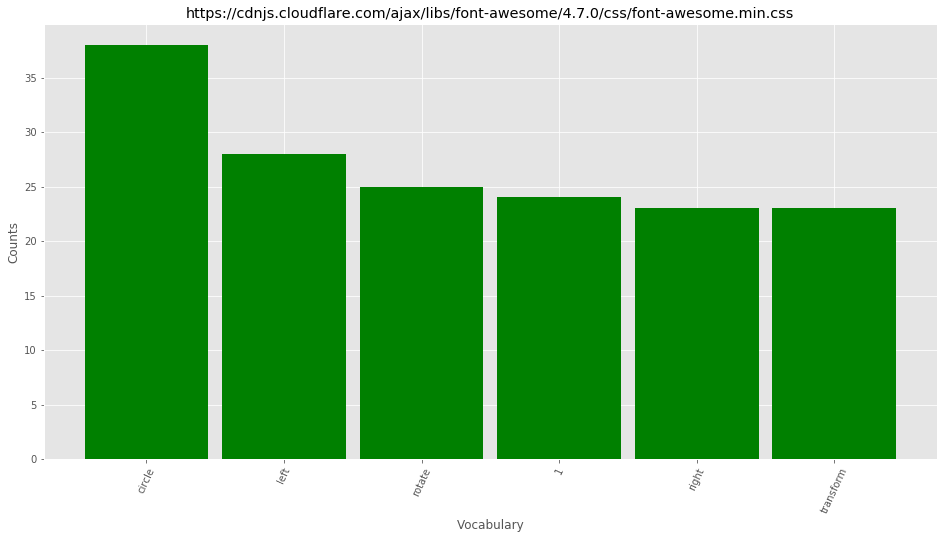

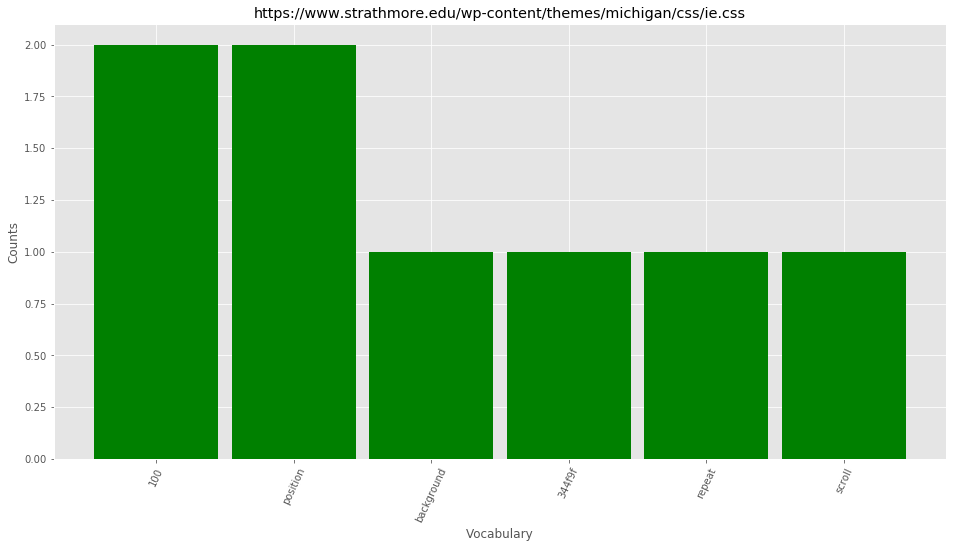

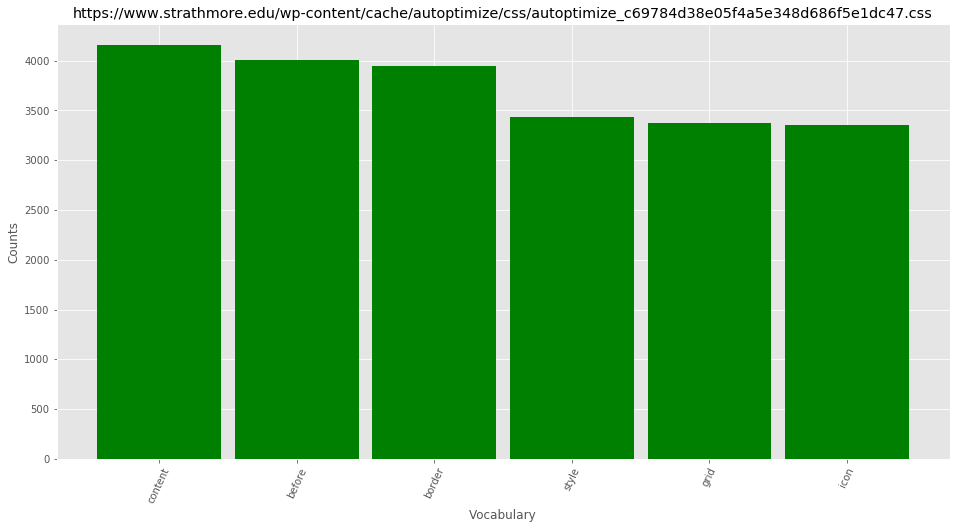

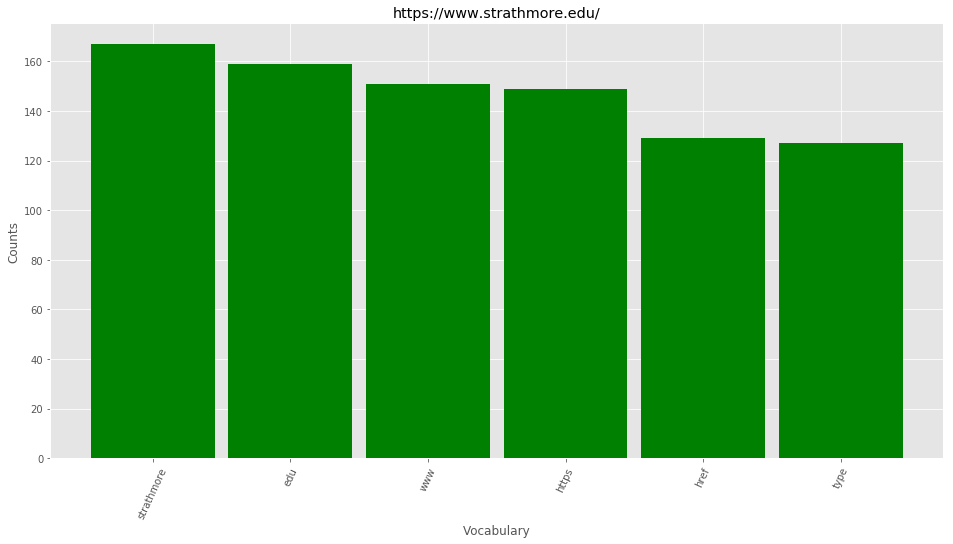

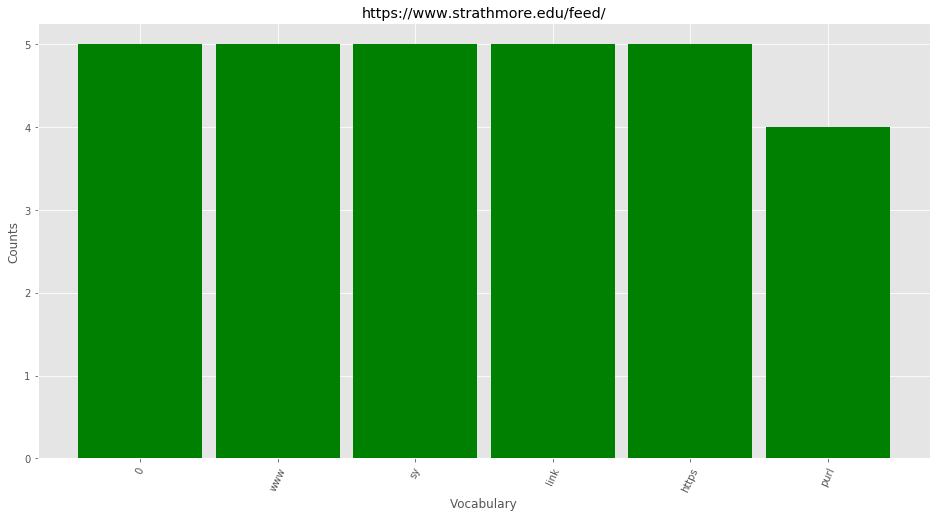

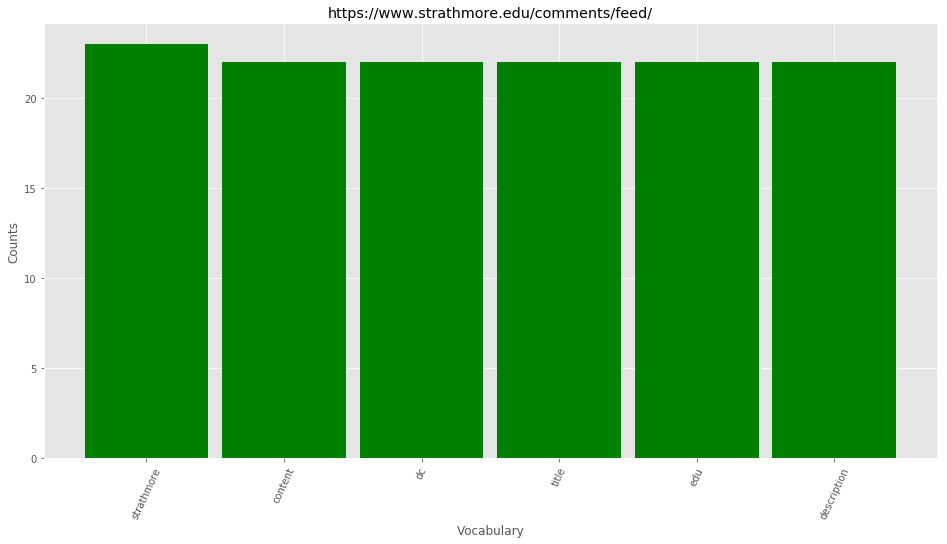

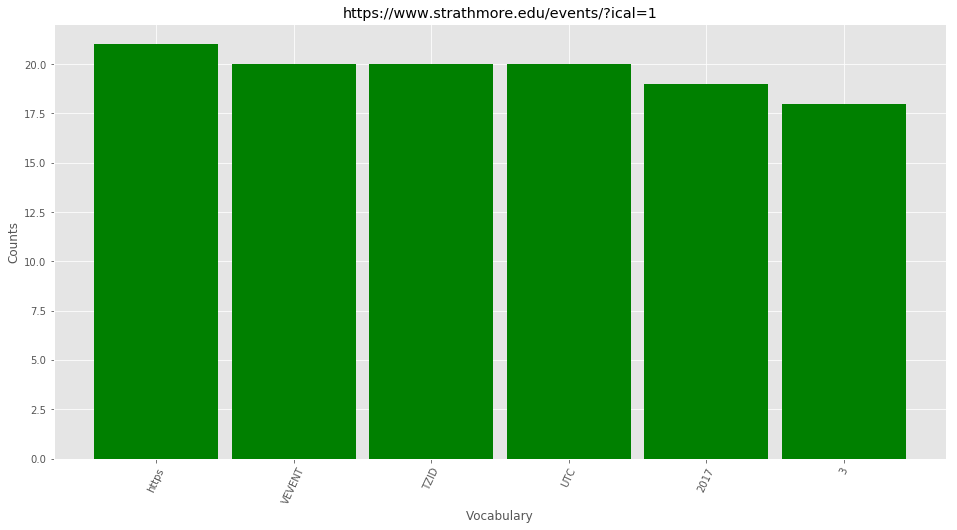

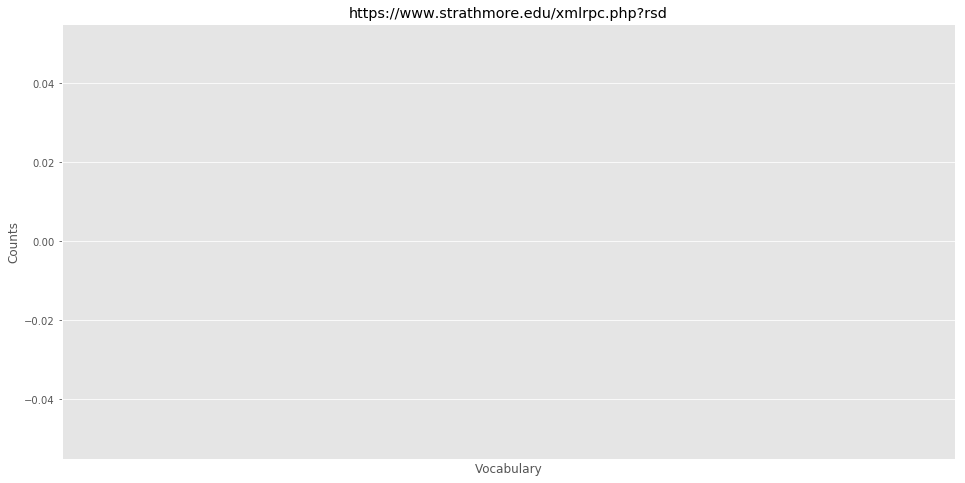

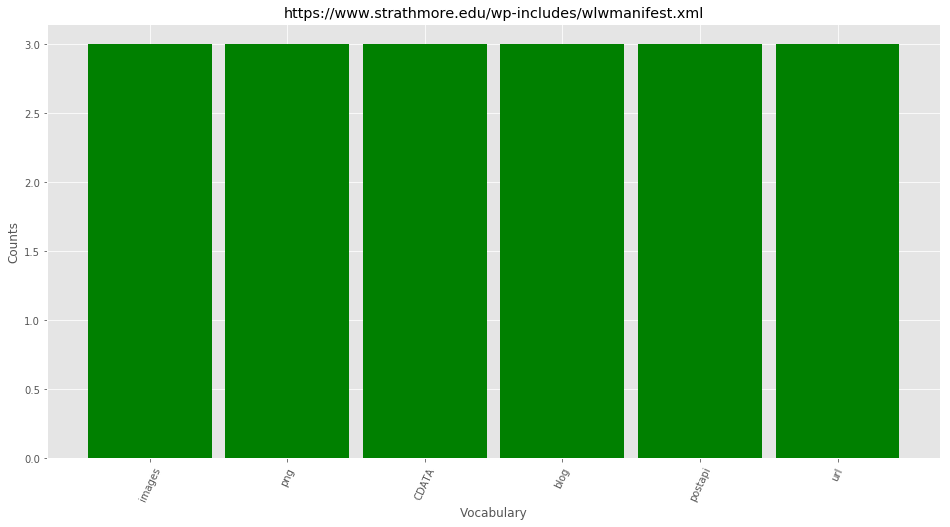

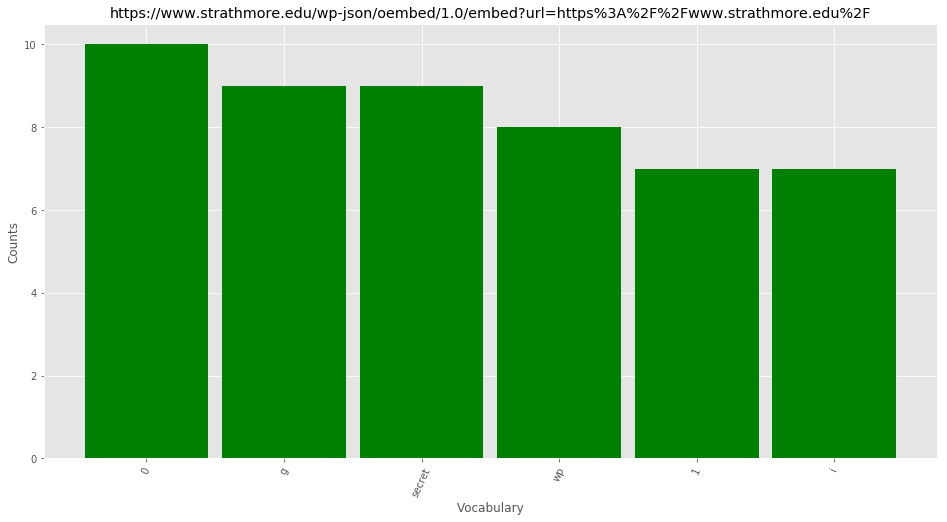

In [22]:
for url,frequency in word_frequencies.items():
    words,counts = generate_points(frequency)
    plt.bar(range(len(words)), counts, color='green',width=0.9)
    plt.xticks(range(len(words)),words,rotation=65)
    plt.xlabel('Vocabulary')
    plt.ylabel('Counts')
    plt.title(url)
    plt.show()